In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

In [10]:
data_Latih = pd.read_excel('cc.xlsx')


In [11]:
data_Latih

,Tanggal,Jam(WIB),Lokasi_Kebocoran,Titik_1_PSI,Titik_2_PSI,Titik_3_PSI
0,NaN,NaN,23.2,0,0,NaN
1,NaN,NaN,23.0,18,0,NaN
2,NaN,NaN,18.0,7,1,NaN
3,NaN,NaN,13.0,5,3,NaN
4,NaN,NaN,9.0,3,5,NaN
5,NaN,NaN,4.0,1,7,NaN
6,NaN,NaN,1.0,0,9,NaN
7,NaN,NaN,23.2,0,0,NaN
8,NaN,NaN,23.0,18,0,NaN
9,NaN,NaN,18.0,7,1,NaN


In [120]:
data_Uji

,Tanggal,Jam(WIB),Titik_1(PSI),Titik_2(PSI),Titik_3(PSI)
0,NaN,NaN,137.7880,84.1232,NaN
1,NaN,NaN,137.7880,89.9248,NaN
2,NaN,NaN,123.2840,75.4208,NaN
3,NaN,NaN,126.1848,76.8712,NaN
4,NaN,NaN,0.0000,0.0000,NaN
5,NaN,NaN,134.0000,81.0000,NaN


In [12]:
print('Variabel Untuk Uji Regresi Data')
columns_to_drop = ['Tanggal','Jam(WIB)','Lokasi_Kebocoran','Titik_3_PSI']  # Ganti dengan nama kolom yang ingin dihapus

a = data_Latih.drop(columns=columns_to_drop)

out_cols = data_Latih['Lokasi_Kebocoran']
b = out_cols

Variabel Untuk Uji Regresi Data


In [13]:
a

,Titik_1_PSI,Titik_2_PSI
0,0,0
1,18,0
2,7,1
3,5,3
4,3,5
5,1,7
6,0,9
7,0,0
8,18,0
9,7,1


In [14]:
b

0     23.2
1     23.0
2     18.0
3     13.0
4      9.0
5      4.0
6      1.0
7     23.2
8     23.0
9     18.0
10    13.0
11     9.0
12     4.0
13     1.0
14    23.2
15    23.0
16    18.0
17    13.0
18     9.0
19     4.0
20     1.0
Name: Lokasi_Kebocoran, dtype: float64

In [15]:
import statsmodels.api as sm
X = sm.add_constant(a)
model = sm.OLS(b, X).fit()
print(model.summary())
r_squared=model.rsquared
print("R-squared:", r_squared)

                            OLS Regression Results                            
Dep. Variable:       Lokasi_Kebocoran   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     433.4
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           5.97e-16
Time:                        09:11:42   Log-Likelihood:                -33.074
No. Observations:                  21   AIC:                             72.15
Df Residuals:                      18   BIC:                             75.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          21.7274      0.633     34.335      

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression


# Membuat model regresi linier berganda
model = LinearRegression()

# Melatih model menggunakan data
model.fit(a, b)

# Mendapatkan koefisien (b1, b2, ..., bn) dan intercept (b0)
coefficients = model.coef_
intercept = model.intercept_

# Menampilkan persamaan regresi
equation = "y = {:.2f}".format(intercept)
for i, coef in enumerate(coefficients):
    equation += " + {:.2f}x{}".format(coef, i+1)

print("Persamaan Regresi:", equation)


Persamaan Regresi: y = 21.73 + 0.01x1 + -2.45x2


In [17]:
r_squared

0.9796542382168718

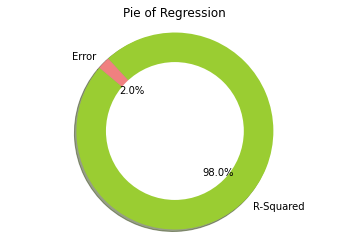

Persamaan Regresi: y = 21.73 + 0.01x1 + -2.45x2
Nilai R-squared: 0.9796542382168718


In [18]:
import matplotlib.pyplot as plt

# Data untuk grafik pie
error=1-r_squared
labels = ['R-Squared', 'Error']
sizes = [r_squared, error]
colors = ['yellowgreen', 'lightcoral']

# Membuat grafik pie
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Membuat lingkaran dalam (sebagai "donut chart")
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Memberi judul pada grafik
plt.title('Pie of Regression')

# Menampilkan grafik
plt.axis('equal')  # Membuat aspek rasio menjadi sama, sehingga grafik menjadi lingkaran
plt.show()
print("Persamaan Regresi:", equation)
print("Nilai R-squared:", r_squared)


In [129]:
print('Correlation table')
Cor_Data=data_Latih.corr()
Cor_Data

Correlation table


ValueError: could not convert string to float: '11.40-11.47'

In [130]:
print('----------------------------------------Training Section----------------------------------------')

----------------------------------------Training Section----------------------------------------


In [131]:
df = pd.DataFrame(data_Latih)
selected_columns = ['Titik_1(PSI)','Titik_2(PSI)']  # Kolom yang ingin diambil
x = df[selected_columns]

out_cols = data_Latih['Lokasi_Kebocoran']
y = out_cols

In [132]:
x

,Titik_1(PSI),Titik_2(PSI)
0,137.7880,89.9248
1,136.3376,87.0240
2,137.7880,84.1232
3,134.8872,88.4744
4,137.7880,88.4744
...,...,...
220,134.0000,81.7000
221,134.0000,81.8000
222,135.0000,82.0000
223,135.0000,82.5000


In [133]:
y

0      26.42
1      26.42
2      26.42
3      26.42
4      26.42
       ...  
220    23.60
221    23.60
222    23.60
223    23.60
224    23.60
Name: Lokasi_Kebocoran, Length: 225, dtype: float64

In [134]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

Data_Train=pd.concat([x_train,y_train],axis = 1)
Data_Train

,Titik_1(PSI),Titik_2(PSI),Lokasi_Kebocoran
26,123.28400,75.42080,3.96
136,135.87830,88.40411,26.42
40,1.34867,34.66833,0.00
13,127.63520,73.97040,4.24
124,135.09158,88.40411,26.42
...,...,...,...
67,1.96681,34.66833,0.00
192,129.70000,79.76000,25.01
117,135.70972,88.40000,26.42
47,1.91061,38.42260,0.00


In [135]:
Data_Test=pd.concat([x_test,y_test],axis = 1)
Data_Test


,Titik_1(PSI),Titik_2(PSI),Lokasi_Kebocoran
111,135.20396,85.40964,26.42
101,136.21545,87.08286,26.42
197,135.00000,82.00000,23.60
183,131.71989,82.20000,25.01
75,134.58582,87.98000,26.42
...,...,...,...
146,134.58582,88.28400,26.42
96,135.14778,87.62337,26.42
61,2.41636,38.48126,0.00
52,2.02300,35.37226,0.00


In [136]:
x_test

,Titik_1(PSI),Titik_2(PSI)
111,135.20396,85.40964
101,136.21545,87.08286
197,135.00000,82.00000
183,131.71989,82.20000
75,134.58582,87.98000
...,...,...
146,134.58582,88.28400
96,135.14778,87.62337
61,2.41636,38.48126
52,2.02300,35.37226


In [137]:
from sklearn.tree import DecisionTreeRegressor
Dc = DecisionTreeRegressor(max_depth=3, random_state=30) 
Dc.fit(x_train, y_train)
predictions_D3 = Dc.predict(x_test)
print(predictions_D3)

[26.42       26.42       23.788      25.13       26.42        0.
 26.42       26.42       23.788      26.42       26.42       26.42
 26.42       26.42       26.42       26.42       26.42       26.42
  0.         26.42       26.42       26.42       25.13       26.15
 26.42       26.42       26.42        0.          4.12833333 23.788
 26.42       26.42       26.42        0.         26.42       26.42
  4.12833333 26.42       26.42       26.42       26.15       26.42
 26.42       26.42        0.         25.13       25.13       26.42
 26.42       23.788      25.13       26.42       25.13       26.42
 25.13       26.42       26.42       26.42       26.42       23.788
  0.         23.788      26.42       26.42       26.42        0.
  0.          0.        ]


In [138]:
y_test

111    26.42
101    26.42
197    23.60
183    25.01
75     26.42
       ...  
146    26.42
96     26.42
61      0.00
52      0.00
66      0.00
Name: Lokasi_Kebocoran, Length: 68, dtype: float64

In [139]:
from sklearn.metrics import mean_absolute_error
mae_D3=mean_absolute_error(y_test,predictions_D3)
print('MAE:%f'%mae_D3, "%")
from sklearn.metrics import mean_squared_error
mse_D3 = mean_squared_error(y_test, predictions_D3)
print("MSE:", mse_D3, "%")
rmse_D3 = np.sqrt(mse_D3)
print("RMSE:", rmse_D3, "%")
acc_D3 = ((100 - mae_D3))
print("accuracy:", acc_D3, "%")

MAE:0.654824 %
MSE: 13.261318669934631 %
RMSE: 3.6416093516376287 %
accuracy: 99.34517647058821 %


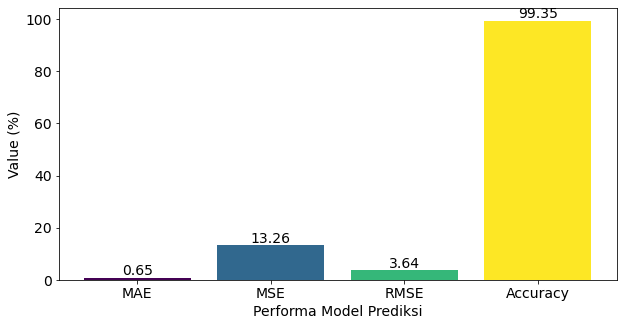

In [140]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['MAE', 'MSE', 'RMSE','Accuracy']


data_values = [mae_D3, mse_D3,rmse_D3,acc_D3]

# Warna yang berbeda untuk setiap batang
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

# Membuat grafik batang dengan ukuran panjang 25 dan lebar 10
plt.figure(figsize=(10, 5))

# Membuat grafik batang dengan warna yang berbeda
bars = plt.bar(categories, data_values, color=colors)

# Memberikan label sumbu x dan y serta judul
plt.xlabel('Performa Model Prediksi', fontsize=14)
plt.ylabel('Value (%)', fontsize=14)


# Menambahkan label pada setiap batang
for bar, value in zip(bars, data_values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, round(value, 2), ha='center', va='bottom', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Menampilkan grafik
plt.show()


In [141]:
df1 = pd.DataFrame({"Prediktif": predictions_D3})
df1

,Prediktif
0,26.420
1,26.420
2,23.788
3,25.130
4,26.420
...,...
63,26.420
64,26.420
65,0.000
66,0.000


In [142]:
df2 = pd.DataFrame({"Aktual": y_test})
df2

,Aktual
111,26.42
101,26.42
197,23.60
183,25.01
75,26.42
...,...
146,26.42
96,26.42
61,0.00
52,0.00


In [143]:
data_Uji

,Tanggal,Jam(WIB),Titik_1(PSI),Titik_2(PSI),Titik_3(PSI)
0,NaN,NaN,137.7880,84.1232,NaN
1,NaN,NaN,137.7880,89.9248,NaN
2,NaN,NaN,123.2840,75.4208,NaN
3,NaN,NaN,126.1848,76.8712,NaN
4,NaN,NaN,0.0000,0.0000,NaN
5,NaN,NaN,134.0000,81.0000,NaN


In [144]:
DFF = pd.DataFrame(data_Uji)
selected_columns = ['Titik_1(PSI)','Titik_2(PSI)']  # Kolom yang ingin diambil
Predict_Loct = DFF[selected_columns]
Predict_Loct

,Titik_1(PSI),Titik_2(PSI)
0,137.7880,84.1232
1,137.7880,89.9248
2,123.2840,75.4208
3,126.1848,76.8712
4,0.0000,0.0000
5,134.0000,81.0000


In [145]:
from sklearn.tree import DecisionTreeRegressor
Dc = DecisionTreeRegressor(max_depth=3, random_state=30) 
Dc.fit(x_train, y_train)
predictions_Loct = Dc.predict(Predict_Loct)
print(predictions_Loct)

[26.42       26.42        3.96        4.12833333  0.         23.788     ]


In [146]:
column_names = ["Prediksi_Lokasi_Kebocoran ( ± KM)"]
Tabel_Pred = pd.DataFrame(predictions_Loct, columns=column_names)

# Menampilkan DataFrame
print(Tabel_Pred)

   Prediksi_Lokasi_Kebocoran ( ± KM)
0                          26.420000
1                          26.420000
2                           3.960000
3                           4.128333
4                           0.000000
5                          23.788000


In [147]:
new_res = data_Uji
new_res = new_res.reset_index()
#######################################################

#######################################################
res=pd.concat([new_res,Tabel_Pred],axis = 1)
pd.set_option('expand_frame_repr', False)
res

,index,Tanggal,Jam(WIB),Titik_1(PSI),Titik_2(PSI),Titik_3(PSI),Prediksi_Lokasi_Kebocoran ( ± KM)
0,0,NaN,NaN,137.7880,84.1232,NaN,26.420000
1,1,NaN,NaN,137.7880,89.9248,NaN,26.420000
2,2,NaN,NaN,123.2840,75.4208,NaN,3.960000
3,3,NaN,NaN,126.1848,76.8712,NaN,4.128333
4,4,NaN,NaN,0.0000,0.0000,NaN,0.000000
5,5,NaN,NaN,134.0000,81.0000,NaN,23.788000


In [148]:
#######################################################
labelPredict = pd.DataFrame(predictions_Loct,columns=['Output'])
for i in range(len(predictions_Loct)):
    if predictions_Loct[i]==0:
        labelPredict.loc[i] = "Tidak Terdapat Fluida yang Mengalir"
    elif predictions_Loct[i]>=26.42:
        labelPredict.loc[i] = "Tidak Terdapat Kebocoran"
    else:
        labelPredict.loc[i] = "Terjadi Kebocoran"
#######################################################
Tabel_Hasil_Prediksi=pd.concat([res,labelPredict],axis = 1)
pd.set_option('expand_frame_repr', False)

Tabel_Hasil_Prediksi

C:\Users\Acer\AppData\Local\Temp\ipykernel_3948\3542328701.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Tidak Terdapat Kebocoran' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  labelPredict.loc[i] = "Tidak Terdapat Kebocoran"


,index,Tanggal,Jam(WIB),Titik_1(PSI),Titik_2(PSI),Titik_3(PSI),Prediksi_Lokasi_Kebocoran ( ± KM),Output
0,0,NaN,NaN,137.7880,84.1232,NaN,26.420000,Tidak Terdapat Kebocoran
1,1,NaN,NaN,137.7880,89.9248,NaN,26.420000,Tidak Terdapat Kebocoran
2,2,NaN,NaN,123.2840,75.4208,NaN,3.960000,Terjadi Kebocoran
3,3,NaN,NaN,126.1848,76.8712,NaN,4.128333,Terjadi Kebocoran
4,4,NaN,NaN,0.0000,0.0000,NaN,0.000000,Tidak Terdapat Fluida yang Mengalir
5,5,NaN,NaN,134.0000,81.0000,NaN,23.788000,Terjadi Kebocoran


-----------Heat Map Hasil-----------


<AxesSubplot:>

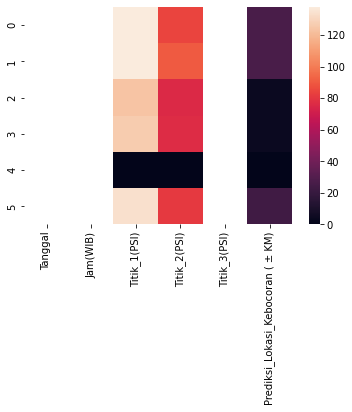

In [115]:
columns_to_drop = ['index']  # Ganti dengan nama kolom yang ingin dihapus
res1 = res.drop(columns=columns_to_drop)
print('-----------Heat Map Hasil-----------')
sns.heatmap(res1)

<AxesSubplot:>

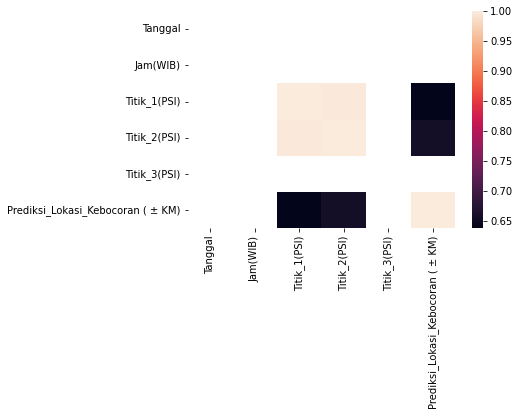

In [116]:
sns.heatmap(res1.corr())

In [34]:
import pickle

In [35]:
filename='Prediksi_Kebocoran_Pipa.sav'
pickle.dump(Dc,open(filename,'wb'))